# In Class Notebook, Week 05

You can click on the GitHub URL of this notebook to access the file in near-real time: https://github.com/UIUC-iSchool-DataViz/is445_bcubcg_fall2024/blob/master/week05/inClass_week05.ipynb 

Or you can copy-paste into the nbviewer interface for a plain-text rendering:

https://kokes.github.io/nbviewer.js/viewer.html

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
buildings = pd.read_csv('https://github.com/UIUC-iSchool-DataViz/is445_data/raw/main/building_inventory.csv',
                       na_values={'Square Footage':0,
                                  'Year Acquired':0,
                                  'Year Constructed':0})

In [5]:
#buildings.head()

In [6]:
stats = buildings.groupby('Year Acquired')['Square Footage'].describe()
stats

,count,mean,std,min,25%,50%,75%,max
Year Acquired,,,,,,,,
1753.0,1.0,1200.000000,NaN,1200.0,1200.0,1200.0,1200.00,1200.0
1802.0,2.0,2220.000000,1943.129435,846.0,1533.0,2220.0,2907.00,3594.0
1810.0,3.0,1344.333333,1809.945948,216.0,300.5,385.0,1908.50,3432.0
1832.0,1.0,120000.000000,NaN,120000.0,120000.0,120000.0,120000.00,120000.0
1837.0,1.0,10302.000000,NaN,10302.0,10302.0,10302.0,10302.00,10302.0
...,...,...,...,...,...,...,...,...
2015.0,20.0,15254.650000,29153.085290,144.0,696.0,3152.0,10590.25,105000.0
2016.0,10.0,30483.900000,61864.180491,1152.0,2464.0,3352.5,3793.00,184000.0
2017.0,1.0,6720.000000,NaN,6720.0,6720.0,6720.0,6720.00,6720.0


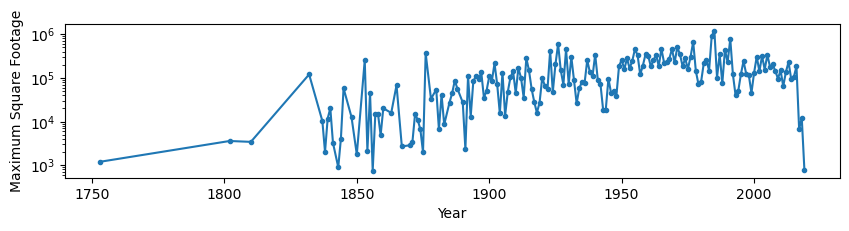

In [10]:
fig, ax = plt.subplots(figsize=(10,2))
ax.plot(stats['max'], marker='.')
ax.set_xlabel('Year')
ax.set_ylabel('Maximum Square Footage')
ax.set_yscale('log')
plt.show()

In [9]:
stats['max'].min(), stats['max'].max()

(750.0, 1200000.0)

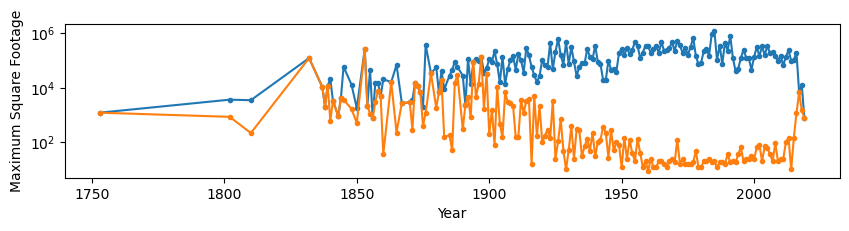

In [11]:
fig, ax = plt.subplots(figsize=(10,2))
ax.plot(stats['max'], marker='.')
ax.plot(stats['min'], marker='.')
ax.set_xlabel('Year')
ax.set_ylabel('Maximum Square Footage')
ax.set_yscale('log')
plt.show()

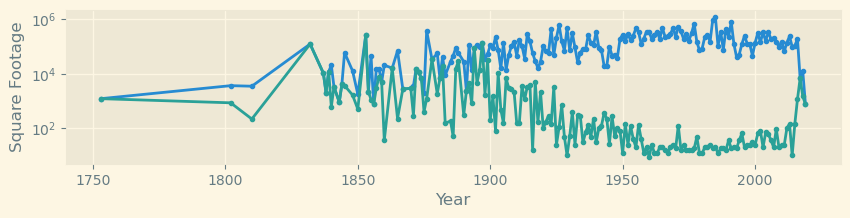

In [15]:
with plt.style.context('Solarize_Light2'):
    # CMD + ]
    fig, ax = plt.subplots(figsize=(10,2))
    ax.plot(stats['max'], marker='.')
    ax.plot(stats['min'], marker='.')
    ax.set_xlabel('Year')
    ax.set_ylabel('Square Footage')
    ax.set_yscale('log')
    plt.show()

In [14]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [16]:
import ipywidgets

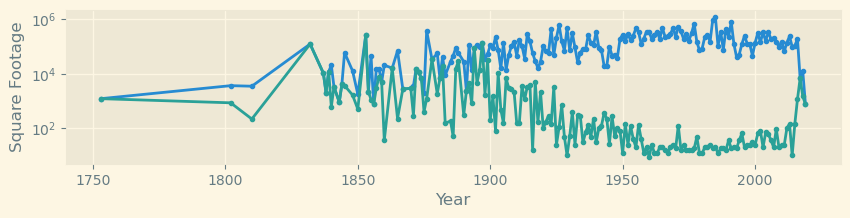

In [17]:
style = 'Solarize_Light2'

with plt.style.context(style):
    # CMD + ]
    fig, ax = plt.subplots(figsize=(10,2))
    ax.plot(stats['max'], marker='.')
    ax.plot(stats['min'], marker='.')
    ax.set_xlabel('Year')
    ax.set_ylabel('Square Footage')
    ax.set_yscale('log')
    plt.show()

In [19]:
#style = 'Solarize_Light2'
@ipywidgets.interact(style = plt.style.available)
def make_plot(style): # function with my interactive parameter as input
    with plt.style.context(style):
        # CMD + ]
        fig, ax = plt.subplots(figsize=(10,2))
        ax.plot(stats['max'], marker='.')
        ax.plot(stats['min'], marker='.')
        ax.set_xlabel('Year')
        ax.set_ylabel('Square Footage')
        ax.set_yscale('log')
        plt.show()

interactive(children=(Dropdown(description='style', options=('Solarize_Light2', '_classic_test_patch', '_mpl-g…

In [22]:
@ipywidgets.interact(x=10)
def f(x):
    print('my value = ' + str(x))

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

In [21]:
f(5)

my value = 5


## More complex widgets with Michigan dataset

In [23]:
#!wget https://github.com/UIUC-iSchool-DataViz/is445_data/raw/main/michigan_lld.flt

In [24]:
#michigan_file = './michigan_lld.flt' # locally, if I got this with wget command
michigan_file = '/Users/jnaiman/Downloads/michigan_lld.flt'

In [25]:
import numpy as np

In [26]:
michigan = np.fromfile(michigan_file,dtype='f4').reshape(5365,4201)

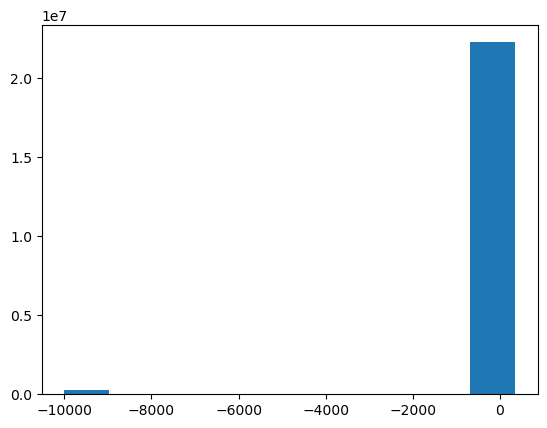

In [27]:
plt.hist(michigan.flatten())
plt.show()

In [28]:
np.min(michigan)

-9999.0

In [29]:
michigan[michigan==-9999] = np.nan

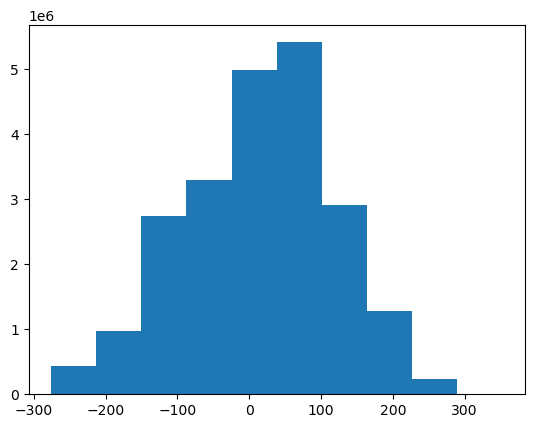

In [31]:
plt.hist(michigan.flatten())
plt.show()

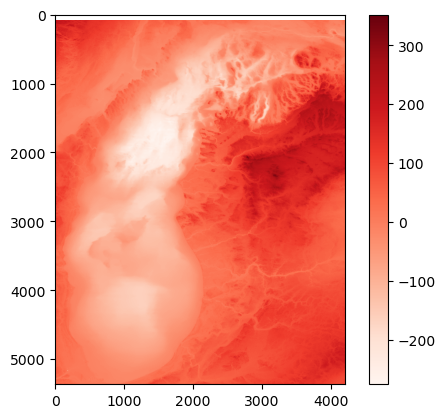

In [32]:
#Step 1 -- make a plot with the value I want to change hard-coded

colormap = 'Reds'

plt.imshow(michigan, cmap=colormap)
plt.colorbar()
plt.show()

In [33]:
# Step 2 -- use this hardcoded value as an input in a function

#colormap = 'Reds'

def make_mich_plot(colormap):
    plt.imshow(michigan, cmap=colormap)
    plt.colorbar()
    plt.show()

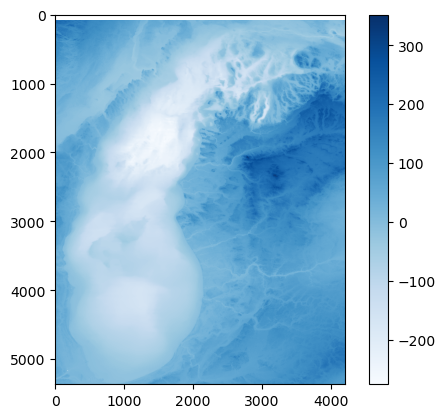

In [35]:
# Step 3 -- "try out" some function values
make_mich_plot('Blues')

In [36]:
plt.colormaps()

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viridis_r',
 'cividis_r',
 'twilight_r',
 'twilight

In [37]:
# Step 4 -- use ipywidgets.interact decorator
@ipywidgets.interact(colormap = plt.colormaps())
def make_mich_plot(colormap):
    plt.imshow(michigan, cmap=colormap)
    plt.colorbar()
    plt.show()

interactive(children=(Dropdown(description='colormap', options=('magma', 'inferno', 'plasma', 'viridis', 'civi…